# Análisis Exploratorio de Datos - Dataset de Ventas

Este notebook contiene el análisis exploratorio completo del dataset de ventas, siguiendo las consignas establecidas.

In [33]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import os
import pyarrow
import pyarrow.parquet as pq
# import fastparquet
# plt.style.use('seaborn')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

# Agregar a las importaciones existentes
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## 1. Carga del Dataset

In [34]:
# Construcción del path relativo al archivo (para que corra en cualquier entorno)
def get_data_path(filename):
    base_dir = os.path.dirname(os.getcwd())
    return os.path.join(base_dir, 'data', filename)


filename = 'sales_data.parquet'


file_path = get_data_path(filename)
df = pd.read_parquet(file_path)


#vemos la extructura del dataset
print(f"Dimensiones: {df.shape}")
print("\nTipos de datos:")
display(df.dtypes)
print("\nValores nulos:")
print(df.isnull().sum().head(52))

Dimensiones: (310217, 52)

Tipos de datos:


factu_codi                      object
factu_nume                       int64
sucur                            int64
fecha                   datetime64[ns]
cliente                          int64
total                          float64
iva1                           float64
lista_precios                    int64
condi_venta                     object
usua                           float64
pedi_codi                       object
pedi_nume                      float64
pedi_sucur                     float64
factu_letra                     object
impor_gravado                  float64
iva_cate                        object
entre_lugar                    float64
entre_fecha             datetime64[ns]
iva_percep                     float64
fecha_regis             datetime64[ns]
conver_alter                   float64
impre_marca                    float64
fecha_alta              datetime64[ns]
host_name_alta                  object
nombre                          object
cuit                     


Valores nulos:
factu_codi                  0
factu_nume                  0
sucur                       0
fecha                       0
cliente                     0
total                       0
iva1                        0
lista_precios               0
condi_venta                 0
usua                      151
pedi_codi                 151
pedi_nume                 151
pedi_sucur                151
factu_letra               151
impor_gravado             151
iva_cate                  151
entre_lugar               151
entre_fecha               151
iva_percep                151
fecha_regis               151
conver_alter              151
impre_marca               151
fecha_alta                151
host_name_alta            151
nombre                      0
cuit                        0
orden_compra_nume       32842
vende                     151
tipo_negocio              151
estado_talon              151
origen_pedido           14621
linea_nume                  0
depo                    

In [79]:
display(df.head())

,factu_codi,factu_nume,sucur,fecha,cliente,total,iva1,lista_precios,condi_venta,usua,pedi_codi,pedi_nume,pedi_sucur,factu_letra,impor_gravado,iva_cate,entre_lugar,entre_fecha,iva_percep,fecha_regis,conver_alter,impre_marca,fecha_alta,host_name_alta,nombre,cuit,orden_compra_nume,vende,tipo_negocio,estado_talon,origen_pedido,linea_nume,depo,produc,canti,precio_uni,boni_porcen,boni_impor,iva1_impor,descrip,iva_percep_porcen,iva_percep_impor,impor_grava,uni_medi,conver,canti_venta,boni_impor_ori,iva_percep_impor_ori,boni_porcen_precio,boni_impor_precio,precio_uni_neto,precio_total,año,mes,dia,dia_semana,hora
0,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,pedim,611190.0,9.0,a,2158.09,ri,1.0,2022-01-17,0.0,2022-01-17,1.0,1.0,2022-01-17 16:06:37.890,server,Bautista Benjamin Godoy,27-37333495-4,NaN,1.0,1.0,r,None,2,NaN,000-999-202201370,2000000,716500000.0,0.0,0.0,300930000.0,turron arcor,0,0.0,1.433000e+09,un,1000000,2000000,0.0,0.0,0,0,716500000.0,1.733930e+09,2022,1,17,Monday,0
1,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,pedim,611190.0,9.0,a,2158.09,ri,1.0,2022-01-17,0.0,2022-01-17,1.0,1.0,2022-01-17 16:06:37.890,server,Bautista Benjamin Godoy,27-37333495-4,NaN,1.0,1.0,r,None,3,1.0,000-000-4013,100000000,14330000.0,0.0,0.0,300930000.0,turron x 25g arcor,0,0.0,1.433000e+09,un,1000000,100000000,0.0,0.0,0,0,14330000.0,1.733930e+09,2022,1,17,Monday,0
2,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,pedim,611190.0,9.0,a,2158.09,ri,1.0,2022-01-17,0.0,2022-01-17,1.0,1.0,2022-01-17 16:06:37.890,server,Bautista Benjamin Godoy,27-37333495-4,NaN,1.0,1.0,r,None,1,1.0,000-000-6614,6000000,59734900.0,0.0,0.0,69250000.0,pure tomate arcor x 520,0,0.0,3.297400e+08,un,1000000,6000000,0.0,0.0,8000000,28672800,54956100.0,3.989900e+08,2022,1,17,Monday,0
3,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,pedim,611190.0,9.0,a,2158.09,ri,1.0,2022-01-17,0.0,2022-01-17,1.0,1.0,2022-01-17 16:06:37.890,server,Bautista Benjamin Godoy,27-37333495-4,NaN,1.0,1.0,r,None,4,1.0,000-000-3777,6000000,34403300.0,0.0,0.0,39010000.0,criollitas original x 100 grs.,0,0.0,1.857800e+08,un,1000000,6000000,0.0,0.0,9999900,20641800,30963000.0,2.247900e+08,2022,1,17,Monday,0
4,fca9,16092,9,2022-01-17,4627,2611.29,453.2,2,00,24.0,pedim,611190.0,9.0,a,2158.09,ri,1.0,2022-01-17,0.0,2022-01-17,1.0,1.0,2022-01-17 16:06:37.890,server,Bautista Benjamin Godoy,27-37333495-4,NaN,1.0,1.0,r,None,5,1.0,000-000-10204,9000000,102337600.0,0.0,0.0,58030000.0,criollitas x 300 grs,0,0.0,2.763100e+08,di,3000000,3000000,0.0,0.0,10000000,30701400,92103800.0,3.343400e+08,2022,1,17,Monday,0


### Diccionario de datos

**factu_codi**: Código identificador del tipo de factura.

**factu_nume**: Número de factura (ID único por factura).

**sucur**: Código de sucursal donde se generó la venta.

**fecha**: Fecha de emisión de la factura.

**cliente**: ID o código único del cliente.

**total**: Importe total de la factura (incluye IVA y descuentos).

**iva1**: Monto del IVA general aplicado en la factura.

**lista_precios**: Código o número de la lista de precios utilizada en la venta.

**condi_venta**: Condición de venta (por ejemplo: contado, crédito, etc.).

**usua**: Código del usuario que realizó la operación.

**pedi_codi**: Código del pedido relacionado a la factura.

**pedi_nume**: Número del pedido relacionado a la factura.

**pedi_sucur**: Sucursal donde se emitió el pedido original.

**factu_letra**: Letra de la factura (ej. A, B, C, según tipo impositivo).

**impor_gravado**: Importe gravado sin incluir impuestos.

**iva_cate**: Categoría de IVA del cliente (ej. "ri" = Responsable Inscripto).

**entre_lugar**: Código o indicador del lugar de entrega.

**entre_fecha**: Fecha pactada para la entrega del pedido.

**iva_percep**: Monto correspondiente a percepciones de IVA.

**fecha_regis**: Fecha de registro en el sistema.

**onver_alter**: Factor de conversión alternativo (ej. para unidades de medida).

**impre_marca**: Indicador de si fue marcada como impresa en sistema.

**fecha_alta**: Fecha en que se dio de alta el registro.

**host_name_alta**: Nombre del servidor o equipo donde se creó el registro.

**nombre**: Nombre completo del cliente.

**cuit**: CUIT del cliente (Clave Única de Identificación Tributaria).

**orden_compra_nume**: Número de orden de compra del cliente (si aplica).

**vende**: Código del vendedor asociado a la venta.

**tipo_negocio**: Clasificación del tipo de negocio o canal de venta.

**estado_talon**: Estado del talonario/factura (ej. registrada, anulada, etc.).

**origen_pedido**: Origen del pedido (puede indicar si fue online, presencial, etc.).

**linea_nume**: Número de línea dentro de la factura (ítem).

**depo**: Código del depósito desde donde se entregó el producto.

**produc**: Código del producto vendido.

**canti**: Cantidad vendida (en unidades internas del sistema).

**precio_uni**: Precio unitario sin descuentos ni impuestos.

**boni_porcen**: Porcentaje de bonificación aplicado al producto.

**boni_impor**: Importe descontado en la bonificación.

**iva1_impor**: Importe del IVA correspondiente a este ítem.

**descrip**: Descripción del producto.

**iva_percep_porcen**: Porcentaje de percepción de IVA aplicada.

**iva_percep_impor**: Importe de percepción de IVA para el ítem.

**impor_grava**: Importe gravado a nivel ítem.

**uni_medi**: Unidad de medida del producto (ej. "un" = unidad).

**conver**: Factor de conversión para pasar de unidad de venta a unidad interna.

**canti_venta**: Cantidad expresada en unidad de venta.

**boni_impor_ori**: Importe original bonificado (antes de ajustes).

**iva_percep_impor_ori**: Importe original de percepción de IVA.

**boni_porcen_precio**: Porcentaje de bonificación aplicado al precio unitario.

**boni_impor_precio**: Importe bonificado sobre el precio unitario.

**precio_uni_neto**: Precio unitario final neto (luego de bonificaciones).

**precio_total**: Precio total del ítem (precio neto * cantidad).

## 2. Limpieza Básica

In [27]:
# Porcentaje de valores nulos por columna
nulos_porcentaje = (df.isnull().sum() / len(df)) * 100

# Mostrar % solo de columnas con valores nulos
print("Porcentaje de valores nulos por columna:")
print(nulos_porcentaje[nulos_porcentaje > 0])

Porcentaje de valores nulos por columna:
usua                  0.048676
pedi_codi             0.048676
pedi_nume             0.048676
pedi_sucur            0.048676
factu_letra           0.048676
impor_gravado         0.048676
iva_cate              0.048676
entre_lugar           0.048676
entre_fecha           0.048676
iva_percep            0.048676
fecha_regis           0.048676
conver_alter          0.048676
impre_marca           0.048676
fecha_alta            0.048676
host_name_alta        0.048676
orden_compra_nume    10.586783
vende                 0.048676
tipo_negocio          0.048676
estado_talon          0.048676
origen_pedido         4.713152
depo                 17.274037
dtype: float64


## 3. Análisis Descriptivo

In [30]:
# Estadísticas descriptivas

#primero transformamos en obj las columnas las cuales no agregan valor a nuestro analisis descriptivo
df_an_desc= df.copy()

cols_to_object = [
    'factu_nume', 'sucur', 'cliente', 'lista_precios', 'usua',
    'pedi_nume', 'pedi_sucur', 'entre_lugar', 'conver_alter',
    'impre_marca', 'orden_compra_nume', 'vende', 'tipo_negocio',
    'linea_nume', 'depo', 'conver', 'boni_porcen_precio', 'boni_impor_precio'
]

df_an_desc[cols_to_object] = df_an_desc[cols_to_object].astype('object')

print("Estadísticas descriptivas:")
print(df_an_desc.describe())

# Análisis de variables categóricas
for col in df_an_desc.select_dtypes(include=['object']).columns:
    print(f"\nDistribución de {col}:")
    print(df_an_desc[col].value_counts().head())

Estadísticas descriptivas:
                               fecha          total           iva1  \
count                         310217  310217.000000  310217.000000   
mean   2023-03-14 18:01:56.210265600   23166.527166    4002.842426   
min              2022-01-03 00:00:00       0.330000       0.060000   
25%              2022-08-06 00:00:00    4689.720000     809.770000   
50%              2023-03-04 00:00:00   11124.930000    1926.110000   
75%              2023-10-05 00:00:00   25872.780000    4484.580000   
max              2024-06-29 00:00:00  822655.090000  142774.850000   
std                              NaN   40430.104678    6956.650235   

       impor_gravado                    entre_fecha     iva_percep  \
count  310066.000000                         310066  310066.000000   
mean    19056.187255  2023-03-15 10:08:24.310694912     102.437785   
min         0.270000            2022-01-03 00:00:00       0.000000   
25%      3855.150000            2022-08-06 00:00:00       0.00

## 4. Visualizaciones Clave

In [95]:
# 4.1 Análisis Temporal
# Preparación de datos temporales
df_viz_desc= df.copy()
df_viz_desc['año'] = df_viz_desc['fecha'].dt.year
df_viz_desc['mes'] = df_viz_desc['fecha'].dt.month
df_viz_desc['dia'] = df_viz_desc['fecha'].dt.day
df_viz_desc['dia_semana'] = df_viz_desc['fecha'].dt.day_name()


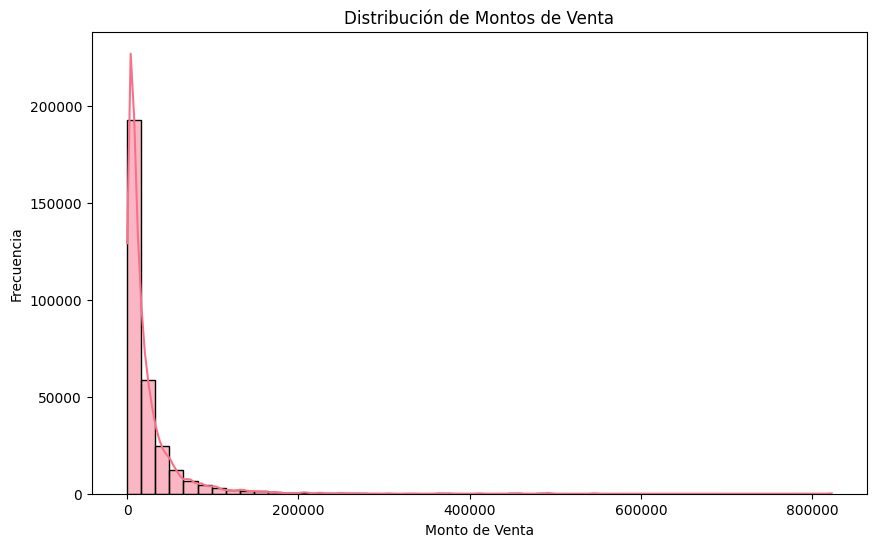

In [96]:
# 4.5 Distribución de Montos de Venta
plt.figure(figsize=(10, 6))
sns.histplot(df['total'], bins=50, kde=True)
plt.title('Distribución de Montos de Venta')
plt.xlabel('Monto de Venta')
plt.ylabel('Frecuencia')
plt.show()

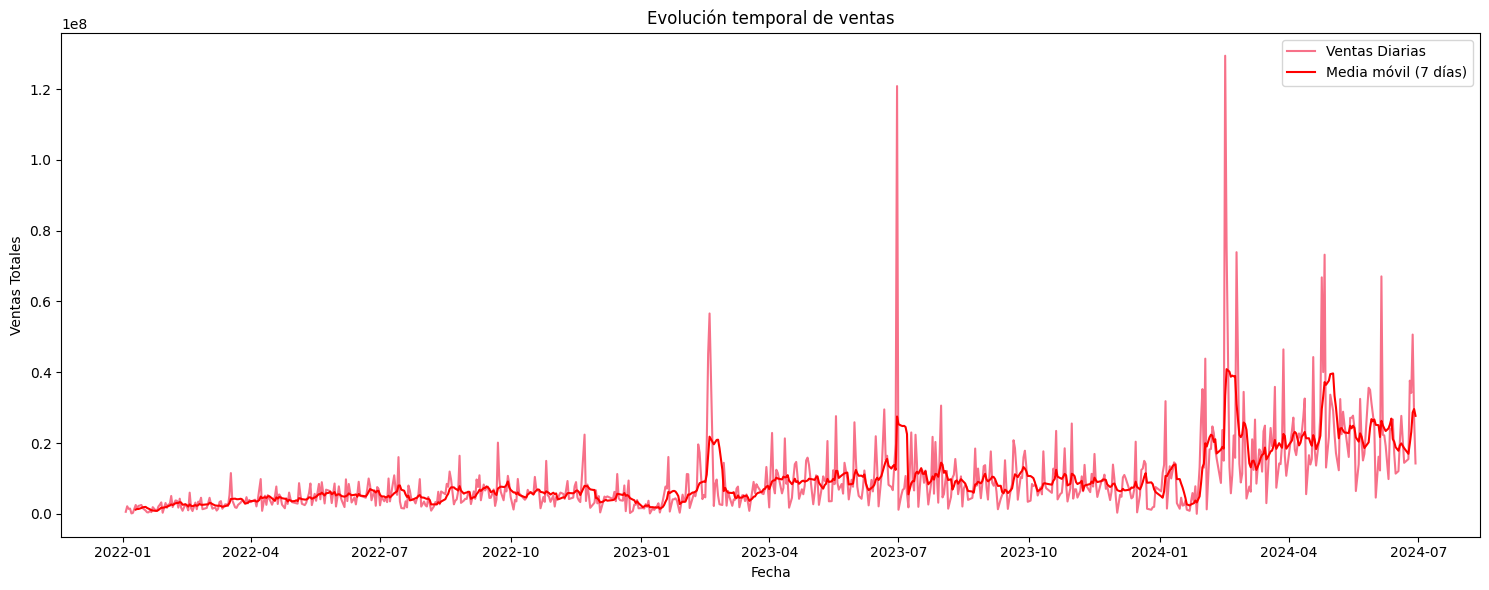

In [97]:
# Calculamos la media móvil de 7 días


ventas_diarias = df_viz_desc.groupby('fecha')['total'].sum().reset_index()
ventas_diarias['media_movil'] = ventas_diarias['total'].rolling(window=7).mean()

plt.figure(figsize=(15, 6))
sns.lineplot(data=ventas_diarias, x='fecha', y='total', label='Ventas Diarias')
sns.lineplot(data=ventas_diarias, x='fecha', y='media_movil', label='Media móvil (7 días)', color='red')

plt.title('Evolución temporal de ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.tight_layout()
plt.show()


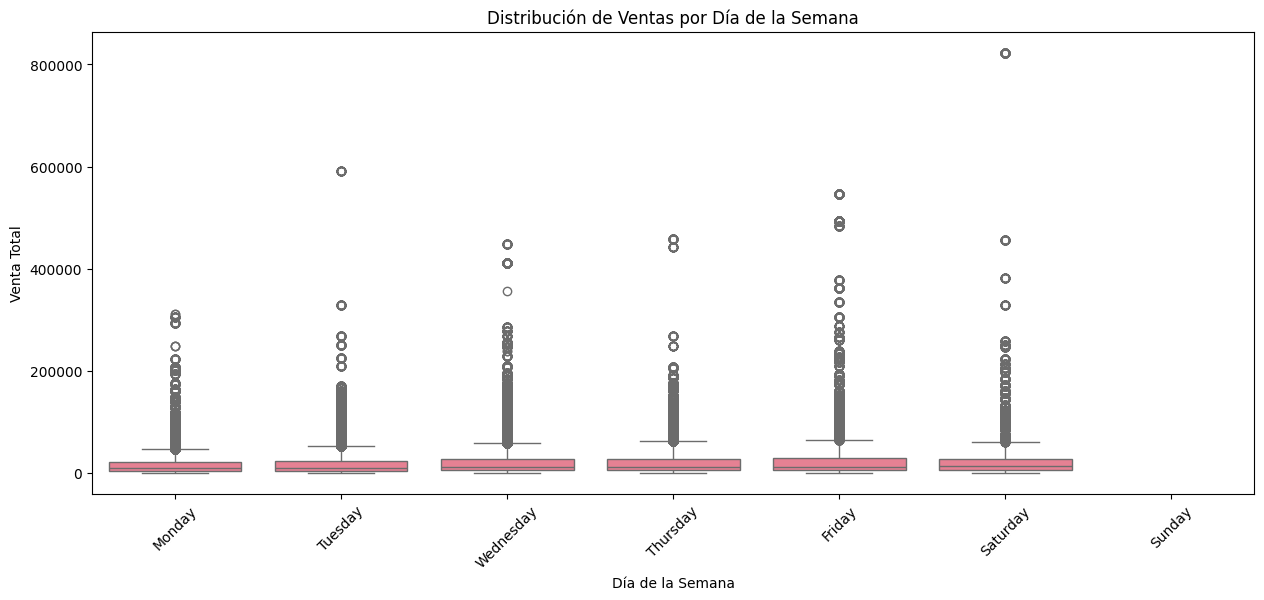

In [98]:
# 4.2 Patrones Semanales
plt.figure(figsize=(15, 6))
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=df, x='dia_semana', y='total', order=dias_orden)
plt.title('Distribución de Ventas por Día de la Semana')
plt.xticks(rotation=45)
plt.xlabel('Día de la Semana')
plt.ylabel('Venta Total')
plt.show()



## 5. Análisis de Granularidad Temporal

C:\Users\Santiago Castellanos\AppData\Local\Temp\ipykernel_12984\3504108803.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



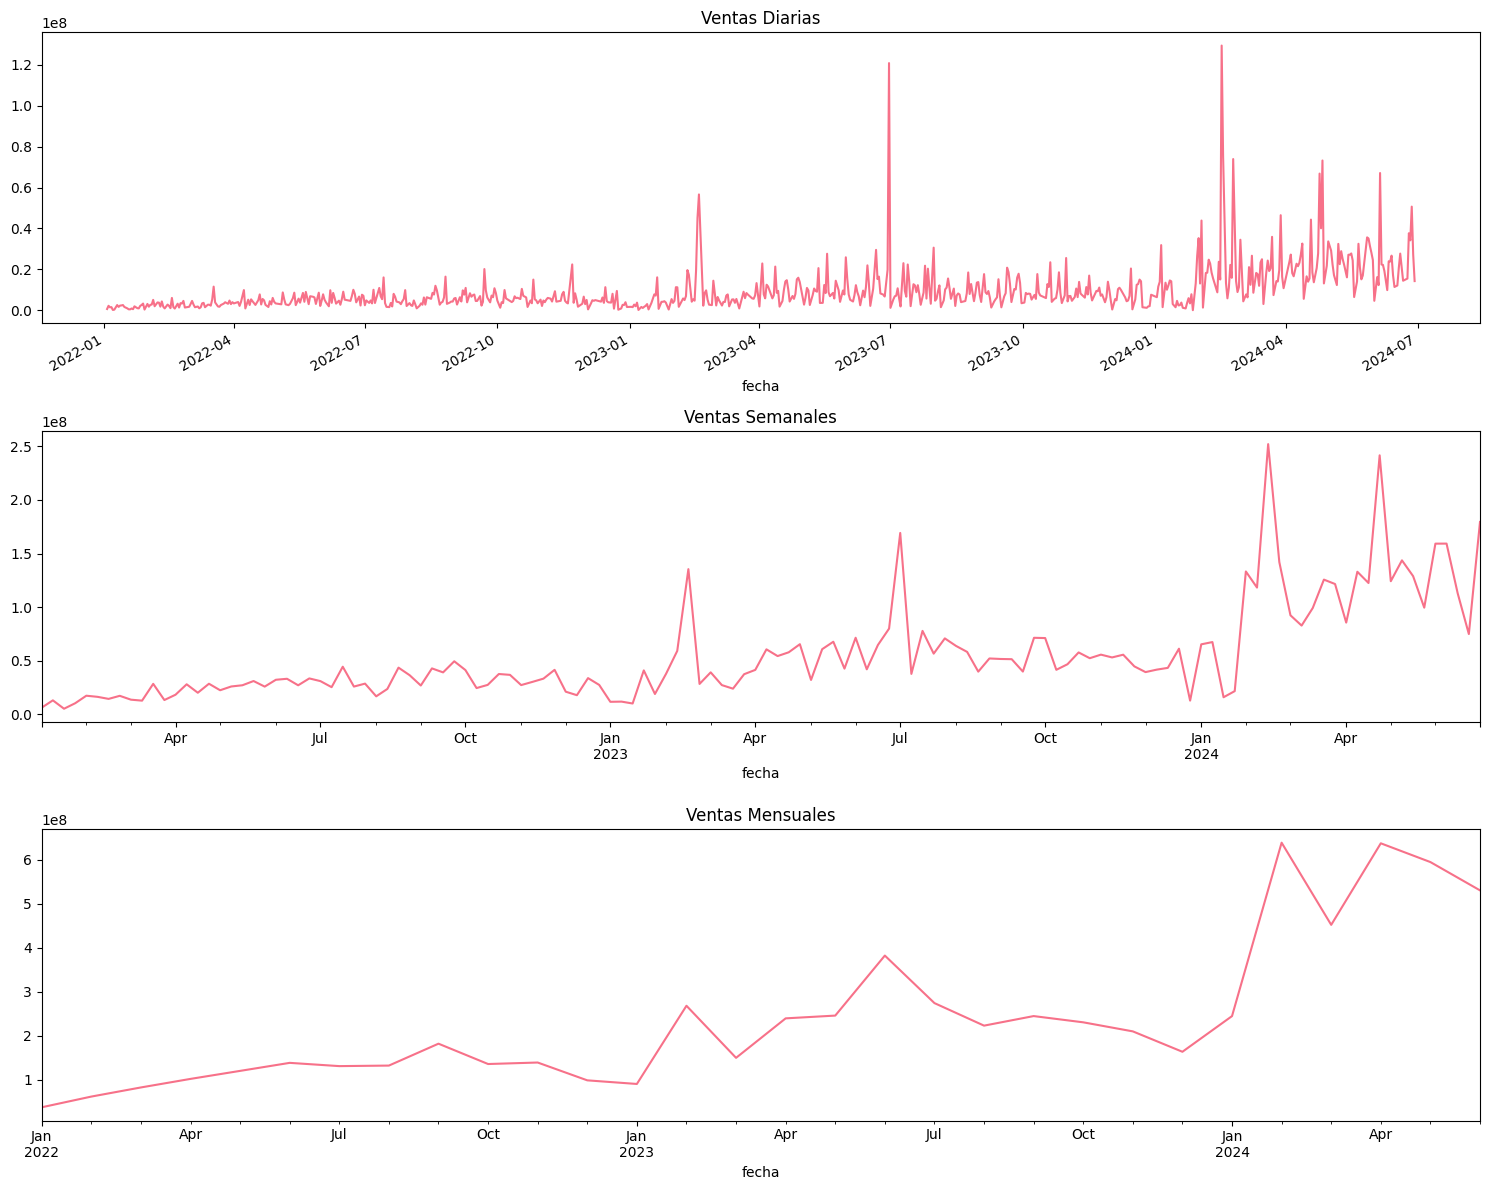

In [99]:
# Análisis de granularidad temporal

# Agrupación diaria
diario = df_viz_desc.groupby('fecha')['total'].sum()

# Agrupación semanal
semanal = df_viz_desc.groupby(pd.Grouper(key='fecha', freq='W'))['total'].sum()

# Agrupación mensual
mensual = df_viz_desc.groupby(pd.Grouper(key='fecha', freq='M'))['total'].sum()

# Visualización comparativa
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

diario.plot(ax=axes[0], title='Ventas Diarias')
semanal.plot(ax=axes[1], title='Ventas Semanales')
mensual.plot(ax=axes[2], title='Ventas Mensuales')

plt.tight_layout()
plt.show()

In [107]:
df['fecha_alta_solo_fecha'] = df['fecha_alta'].dt.date

diferencias = df[df['fecha'] != df['fecha_alta_solo_fecha']]

print(f"Diferencias encontradas: {len(diferencias)}")
#Se puede ver que en un 99% de los registros, nuestra fecha coincide con la fecha de alta, por lo que podemos utilizar la hora de alta como un proxy para nuestro análisis de granularidad temporal.
#Se encuentran 151 diferencias entre fecha y fecha_añta, pero esto es debido a que existen 151 registros que no tienen fecha_alta, pero debido a que en su gran mayoría estas coincide, en un futuro podemos rellenar estas filas vacías con lso vaores de fecha y asignar valores de media para la hora.

Diferencias encontradas: 151


In [108]:
#Esta parte será un poco capciosa
# df['hora'] = df['fecha_alta].dt.hour# El campo fecha NO TIENE la hora, tomaremos la hora de fecha alta como proxy

df_viz_desc['hora'] = df_viz_desc['fecha_alta'].dt.hour

# Calculamos la media de horas no nulas
hora_media = int(df_viz_desc['hora'].dropna().mean())

# Función para completar fecha_alta faltante
def completar_fecha_regis(row):
    if pd.isna(row['fecha_alta']):
        # Combinar la fecha de 'fecha' con la hora media para formar un datetime
        fecha_sin_hora = row['fecha']
        return pd.Timestamp(year=fecha_sin_hora.year,
                            month=fecha_sin_hora.month,
                            day=fecha_sin_hora.day,
                            hour=hora_media)
    else:
        return row['fecha_alta']


df_viz_desc['fecha_alta'] = df_viz_desc.apply(completar_fecha_regis, axis=1)



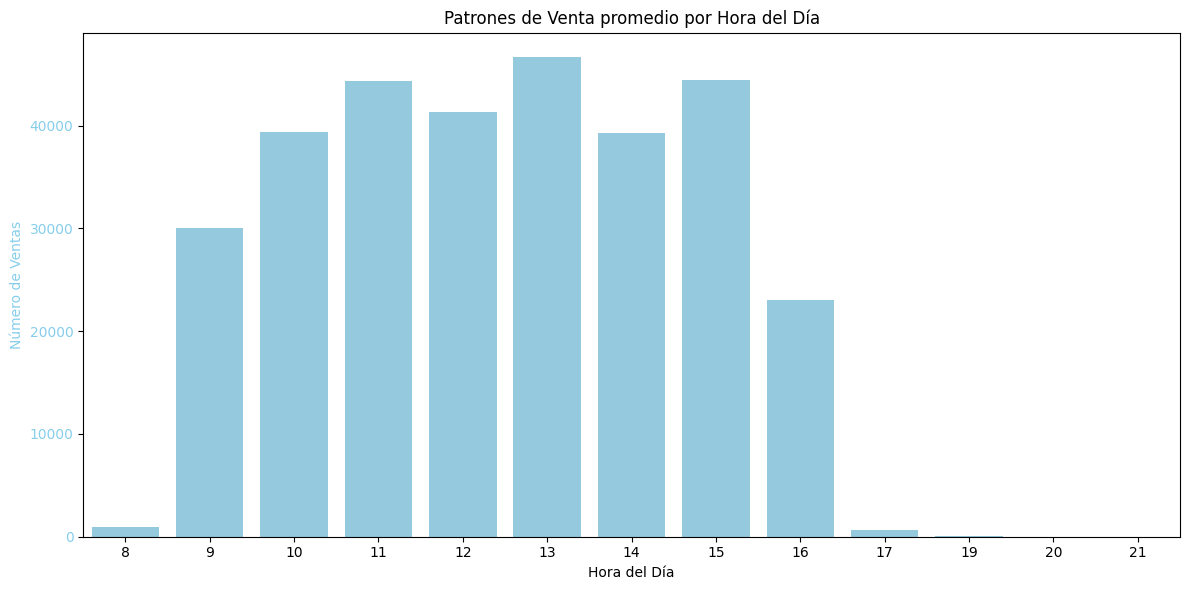

In [111]:
# 4.3 Patrones por Hora del Día

# Agrupación por hora
ventas_hora = df_viz_desc.groupby('hora')['total'].agg(['mean', 'count']).reset_index()  

# Crear figura y eje doble
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='hora', y='count', data=ventas_hora, ax=ax1, color='skyblue')
ax1.set_ylabel("Número de Ventas", color='skyblue')
ax1.set_xlabel("Hora del Día")
ax1.tick_params(axis='y', labelcolor='skyblue')


# Título y ajustes finales
plt.title("Patrones de Venta promedio por Hora del Día")
plt.tight_layout()
plt.show()



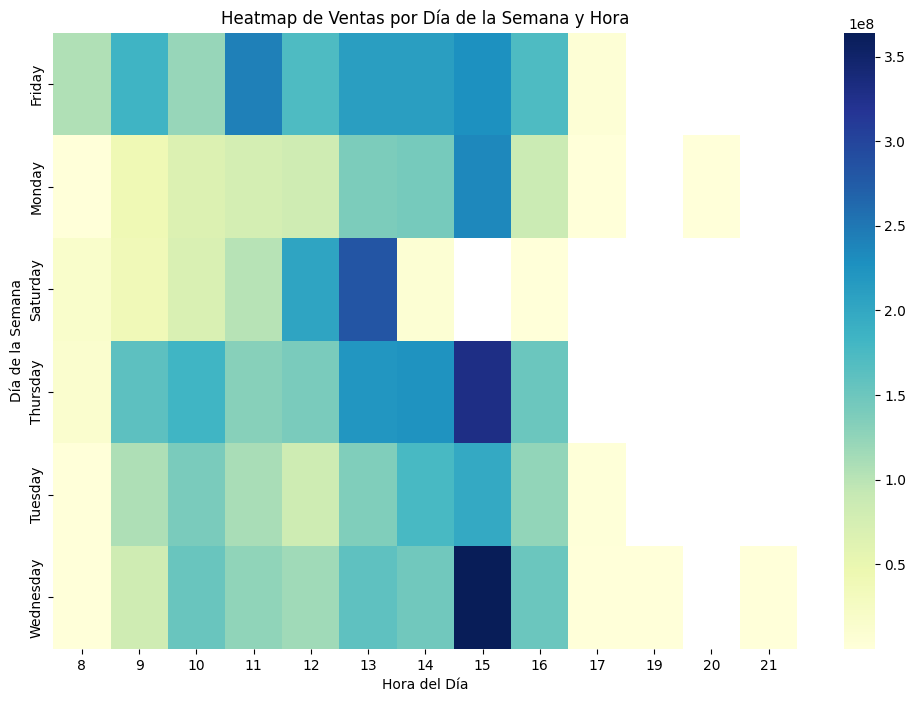

In [112]:
# 4.4 Heatmap de Ventas (Día de la Semana vs Hora)
pivot_table = df_viz_desc.pivot_table(
    index='dia_semana',
    columns='hora',
    values='total',
    aggfunc='sum'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu") 
plt.title('Heatmap de Ventas por Día de la Semana y Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.show()



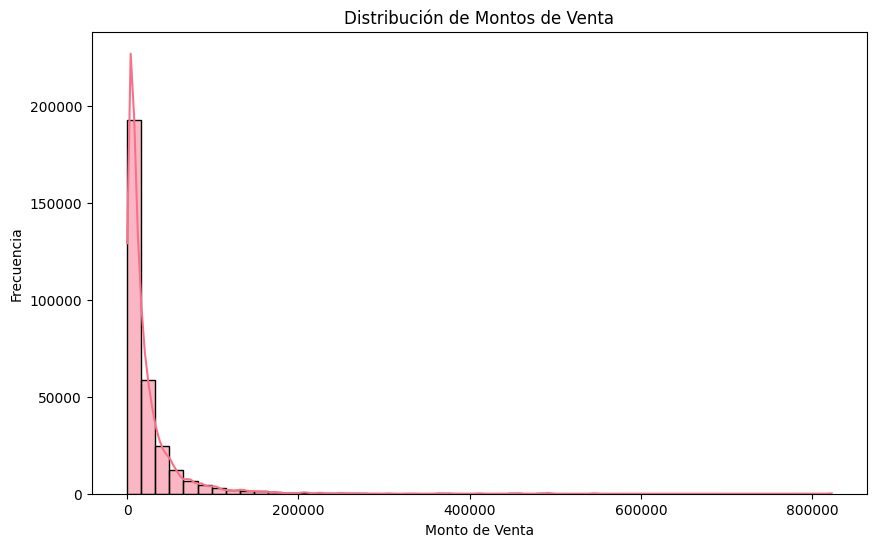

In [113]:
# 4.5 Distribución de Montos de Venta
plt.figure(figsize=(10, 6))
sns.histplot(df['total'], bins=50, kde=True)
plt.title('Distribución de Montos de Venta')
plt.xlabel('Monto de Venta')
plt.ylabel('Frecuencia')
plt.show()

## 6. Análisis por Punto de Venta y Producto

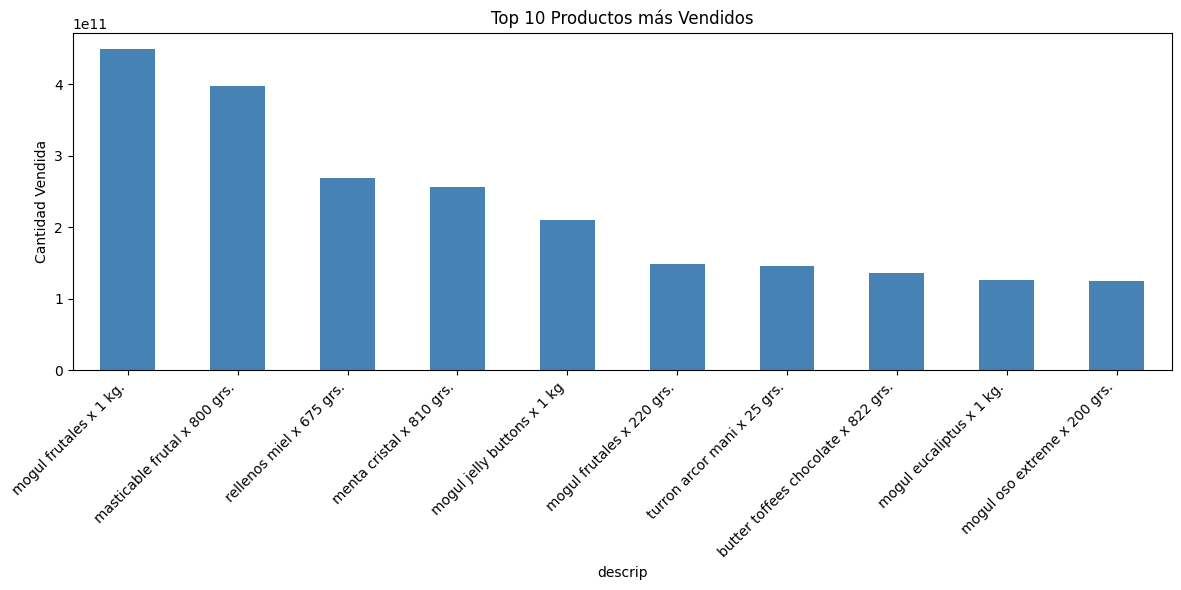

In [104]:
# Top productos por cantidad vendida

top_productos = df.groupby('descrip')['canti'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_productos.plot(kind='bar', color='steelblue')
plt.title('Top 10 Productos más Vendidos')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Santiago Castellanos\AppData\Local\Temp\ipykernel_12984\2226120665.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



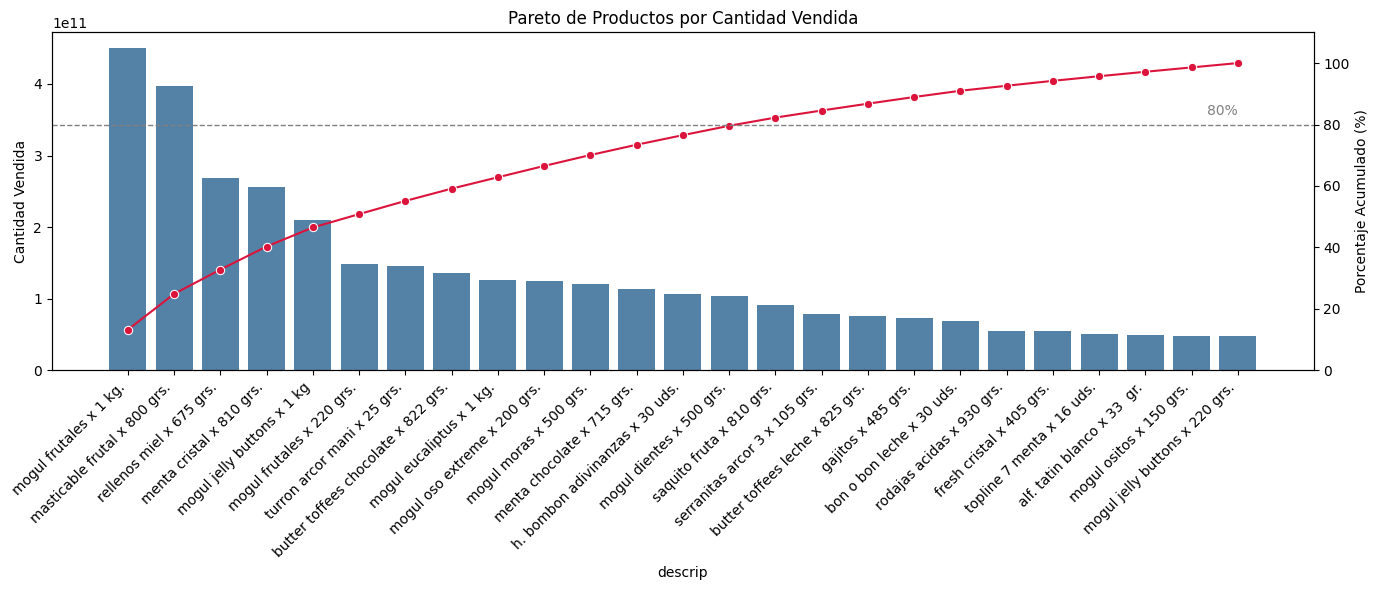

In [105]:
#Pareto de Productos por Cantidad Vendida
# Agrupación y orden descendente por cantidad
top_productos = df.groupby('descrip')['canti'].sum().sort_values(ascending=False).head(25)

# Cálculo del porcentaje acumulado
acumulado = top_productos.cumsum() / top_productos.sum() * 100

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barras del producto
sns.barplot(x=top_productos.index, y=top_productos.values, ax=ax1, color='steelblue')
ax1.set_ylabel('Cantidad Vendida')
ax1.set_title('Pareto de Productos por Cantidad Vendida')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticklabels(top_productos.index, ha='right')

# Línea del porcentaje acumulado (eje secundario)
ax2 = ax1.twinx()
sns.lineplot(x=top_productos.index, y=acumulado.values, ax=ax2, color='crimson', marker='o')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.set_ylim(0, 110)

# Línea del 80%
ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
ax2.text(len(top_productos) - 1, 82, '80%', color='gray', va='bottom', ha='right')

plt.tight_layout()
plt.show()


In [117]:
_cant_productos= df['descrip'].nunique()
print(f"Cantidad de productos únicos: {_cant_productos}")
print((14/_cant_productos)*100)

Cantidad de productos únicos: 3799
0.36851803106080544


Podemos visualizar en este pareto que 14 productos (3.7% de la totalidad de nuestros productos), representa el 80% de nuestras ventas

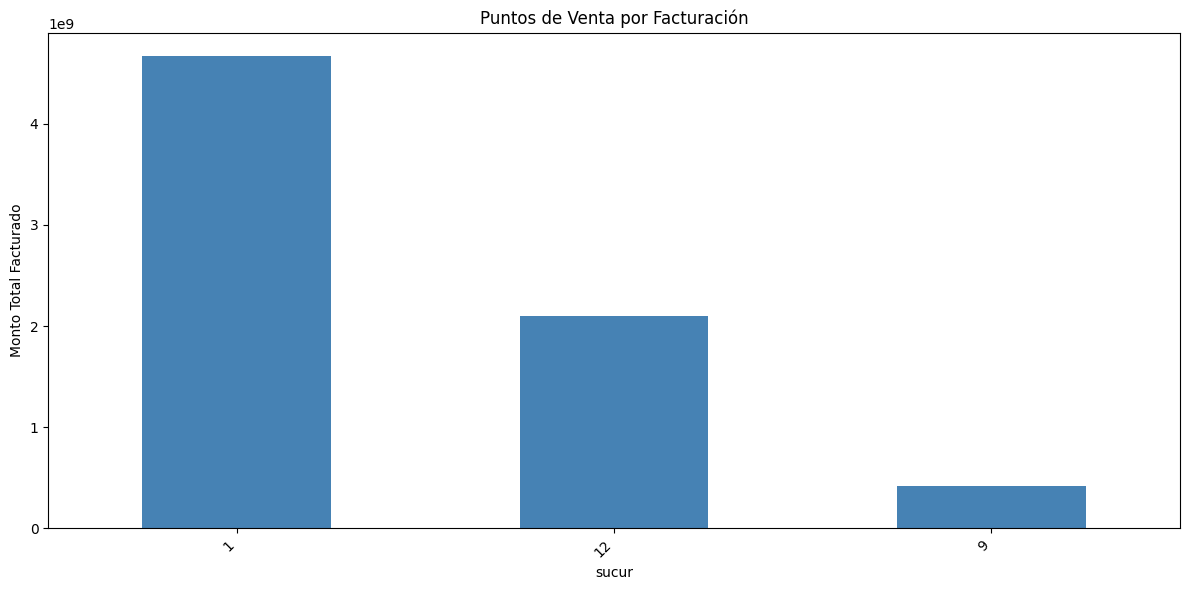

In [114]:
top_pdv = df.groupby('sucur')['total'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_pdv.plot(kind='bar', color='steelblue')
plt.title('Puntos de Venta por Facturación')
plt.ylabel('Monto Total Facturado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 7. Hipótesis y Hallazgos

[Esta sección se completará con los hallazgos específicos después de ejecutar el análisis con los datos reales]

### Respuestas a las preguntas planteadas:

1. Dimensiones del dataset: [Se completará]
2. Valores faltantes: [Se completará]
3. Tipos de variables: [Se completará]
4. Columnas redundantes: [Se completará]
5. Granularidad: [Se completará]
...